In [1]:
import os
import sys
os.path.abspath(os.curdir)
os.chdir("..")
ML_FOLDER_PATH = os.path.abspath(os.curdir)
sys.path.append(ML_FOLDER_PATH)
import numpy as np
from src.nn import NN
import src.helpers as hlp
import matplotlib.pyplot as plt
import pickle
import time

### Neural Network training

In [16]:
#defining data path and models architectures

TRAIN_DATA_PATH = 'data/train.csv'

nn_architecture0 = [
    {"input_dim": 36, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 2, "activation": "softmax"},
]
nn_architecture1 = [
    {"input_dim": 44, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 2, "activation": "softmax"},
]
nn_architecture2 = [
    {"input_dim": 58, "output_dim": 64, "activation": "relu"},
    {"input_dim": 64, "output_dim": 32, "activation": "relu"},
    {"input_dim": 32, "output_dim": 16, "activation": "relu"},
    {"input_dim": 16, "output_dim": 2, "activation": "softmax"},
]

In [18]:
'''
Loading, splitting along PRI_jet_num, preprocessing (polynomial expension, arcsinh transform, standardization),
and train/val split.
'''

train_data_raw0, train_data_raw1, train_data_raw2 = hlp.load_split_data(TRAIN_DATA_PATH, one_hot=True)
train_data0, train_data1, train_data2 = hlp.process_data(
    train_data_raw0, train_data_raw1, train_data_raw2,
)

#delete unused variables to save memory
del train_data_raw0
del train_data_raw1
del train_data_raw2

train_data0, val_data0 = hlp.split_val_train(train_data0,seed=42)
train_data1, val_data1 = hlp.split_val_train(train_data1,seed=42)
train_data2, val_data2 = hlp.split_val_train(train_data2,seed=42)

train_y0, train_data0 = (
    train_data0[:, 1].astype("int32"),
    np.delete(train_data0, [0, 1], axis=1),
)
train_y1, train_data1 = (
    train_data1[:, 1].astype("int32"),
    np.delete(train_data1, [0, 1], axis=1),
)
train_y2, train_data2 = (
    train_data2[:, 1].astype("int32"),
    np.delete(train_data2, [0, 1], axis=1),
)

val_y0, val_data0 = (
    val_data0[:, 1].astype("int32"),
    np.delete(val_data0, [0, 1], axis=1),
)
val_y1, val_data1 = (
    val_data1[:, 1].astype("int32"),
    np.delete(val_data1, [0, 1], axis=1),
)
val_y2, val_data2 = (
    val_data2[:, 1].astype("int32"),
    np.delete(val_data2, [0, 1], axis=1),
)

print(f'dataset 0: {train_data0.shape=},{val_data0.shape=}\n\
dataset 1: {train_data1.shape=}, {val_data1.shape=}\n\
dataset 2: {train_data2.shape=}, {val_data2.shape=}')


dataset 0: train_data0.shape=(99913, 36)
dataset 1: train_data1.shape=(77544, 44)
dataset 2: train_data2.shape=(72543, 58)


In [8]:
#Training of the models using selected the number of epochs maximizing the validation loss and exponential learning rate decay. 

N_epochs = [3001, 1501, 1501]
dec_speed = 500

t0 = time.time()
model0 = NN(nn_architecture0)
model0.init_weights()
print('-----model0 training-----\n')
train_l0, train_a0, val_l0, val_a0 = model0.train(train_data0,train_y0,val_data0,val_y0,max_epochs=N_epochs[0],dec_speed=dec_speed)
t1 = time.time()
print(f'model0 training took {((t1-t0)/60):.2f} minutes')

model1 = NN(nn_architecture1)
model1.init_weights()
print('\n-----model1 training-----\n')
train_l1, train_a1, val_l1, val_a1 = model1.train(train_data1,train_y1,val_data1,val_y1,max_epochs=N_epochs[1],dec_speed=dec_speed,)
t2 = time.time()
print(f'model1 training took {((t2-t1)/60):.2f} minutes')

model2 = NN(nn_architecture2)
model2.init_weights()
print('-----model2 training-----\n')
train_l2, train_a2, val_l2, val_a2 = model2.train(train_data2,train_y2,val_data2,val_y2,max_epochs=N_epochs[2],dec_speed=dec_speed)
t3 = time.time()
print(f'model2 training took {((t3-t2)/60):.2f} minutes')
print(f'training of all models took {((t3-t0)/60):.2f} minutes')

-----model0 training-----

epoch 1 lr 0.4990009993336666
train_loss 0.6929624541941615 train_acc 0.5336462005538195
epoch 2 lr 0.4980039946719958
train_loss 0.6811384132532663 train_acc 0.7456990024577129
epoch 3 lr 0.4970089820269677
train_loss 0.6704707353220151 train_acc 0.7456990024577129
epoch 4 lr 0.49601595741853033
train_loss 0.6608444418824361 train_acc 0.7456990024577129
epoch 5 lr 0.49502491687458405
train_loss 0.6521553002614495 train_acc 0.7456990024577129
epoch 6 lr 0.4940358564309653
train_loss 0.6443092251912536 train_acc 0.7456990024577129
epoch 7 lr 0.493048772131431
train_loss 0.6372216362025216 train_acc 0.7456990024577129
epoch 8 lr 0.49206366002764257
train_loss 0.6308165179999368 train_acc 0.7456990024577129
epoch 9 lr 0.4910805161791504
train_loss 0.6250253930177418 train_acc 0.7456990024577129
epoch 10 lr 0.4900993366533777
train_loss 0.6197866787458517 train_acc 0.7456990024577129
epoch 11 lr 0.4891201175256051
train_loss 0.615045268431374 train_acc 0.74569900

In [12]:
#saving the models weights
models_params = (model0.params, model1.params, model2.params)

for i, model_params in enumerate(models_params):
    f = open(f'models/model{i}_{N_epochs[i]}_ep.pkl', 'wb')
    pickle.dump(model_params,f)

In [16]:
#saving the training logs
pickle.dump(np.array([train_losses,train_accuracies,val_losses,val_accuracies]),open('training_logs.pkl','wb'))

/tmp/ipykernel_1266/2745508655.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  pickle.dump(np.array([train_losses,train_accuracies,val_losses,val_accuracies]),open('training_logs.pkl','wb'))


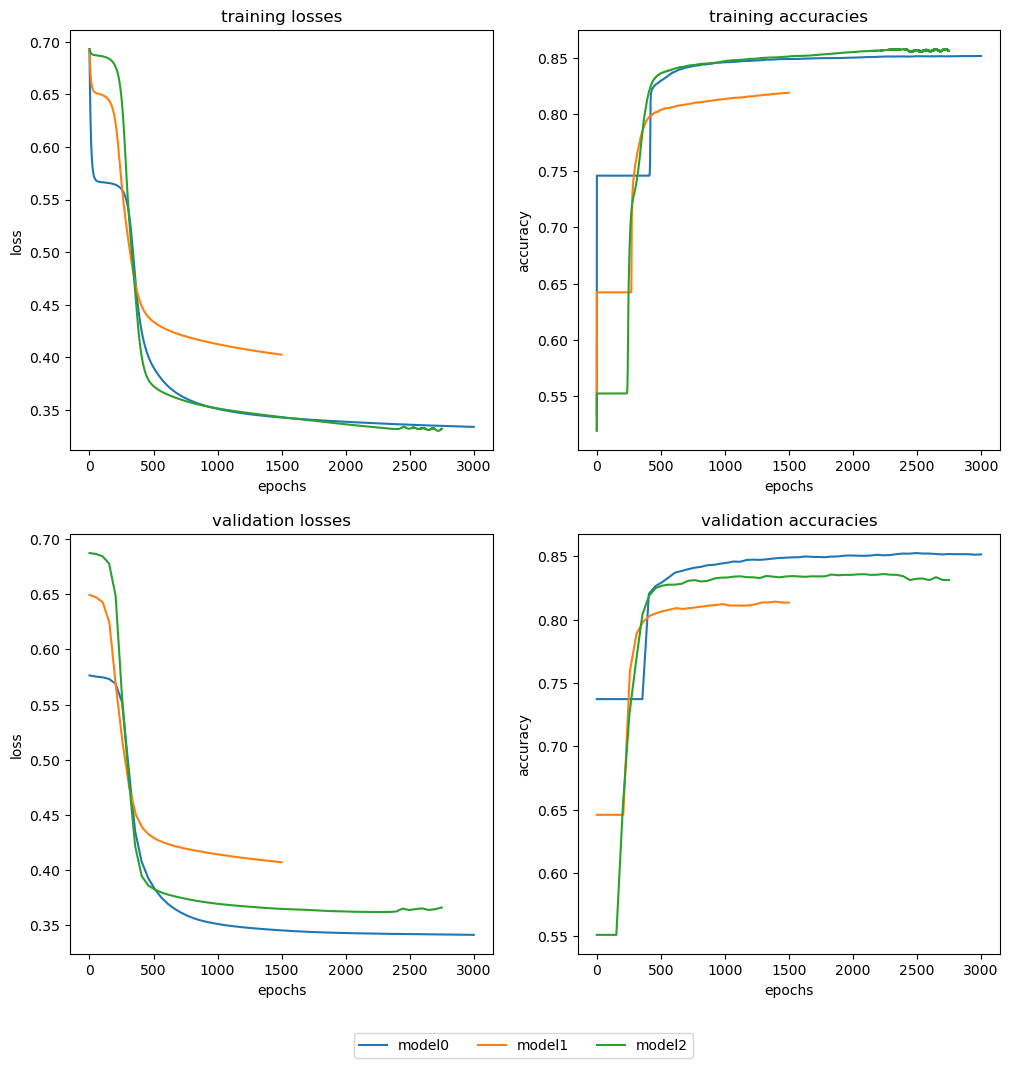

In [14]:
#plotting the train and validation losses and accuracies
train_logs = pickle.load(open("training_logs.pkl",'rb'))
train_losses = train_logs[0,:]
train_accuracies = train_logs[1,:]
val_losses = train_logs[2,:]
val_accuracies = train_logs[3,:]

f, axs = plt.subplots(2,2,figsize=(12,12))
axs[0,0].set_title('training losses')
for i,train_loss in enumerate(train_losses):
    axs[0,0].plot(range(len(train_loss)),train_loss,label=f'model{i}')
axs[0,0].set_xlabel('epochs')
axs[0,0].set_ylabel('loss')

axs[0,1].set_title('training accuracies')
for train_acc in train_accuracies:
    axs[0,1].plot(range(len(train_acc)),train_acc)
axs[0,1].set_xlabel('epochs')
axs[0,1].set_ylabel('accuracy')

axs[1,0].set_title('validation losses')
for i, val_loss in enumerate(val_losses):
    x = np.linspace(0,len(train_losses[i]),len(val_loss))
    axs[1,0].plot(x,val_loss)
axs[1,0].set_xlabel('epochs')
axs[1,0].set_ylabel('loss')

axs[1,1].set_title('validation accuracies')
for i, val_acc in enumerate(val_accuracies):
    x = np.linspace(0,len(train_losses[i]),len(val_acc))
    axs[1,1].plot(x,val_acc)
axs[1,1].set_xlabel('epochs')
axs[1,1].set_ylabel('accuracy')
f.legend(ncol=3,bbox_to_anchor=(0.65, 0.05))
plt.savefig('training_logs.png',dpi=300)